In [52]:
%pip install lightgbm
%pip install scikit-optimize
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 31.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you ma

In [62]:
import warnings
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
import sklearn
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split

# Load Data

In [172]:
n_outputs = 16040

In [238]:
X_train = pd.read_csv('Processed_Data/X_train.csv')
X_test = pd.read_csv('Processed_Data/X_test.csv')
y_train = pd.read_csv('Processed_Data/y_train.csv')
y_test = pd.read_csv('Processed_Data/y_test.csv')

In [239]:
y_train = y_train.iloc[:, :n_outputs]
y_test = y_test.iloc[:, :n_outputs]

In [240]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [241]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

In [177]:
y_val

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,AAAS,AACS,AAGAB,AAK1,AAMDC,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,5.973634,1.339989,7.261231,8.021802,24.671829,0.547648,1.961700,0.953769,1.701621,0.345322,...,-0.424277,2.548691,1.733338,6.723045,6.636466,2.895881,2.974078,-0.076024,1.453228,-0.159255
1,0.849099,0.815003,0.236854,1.252617,7.692090,0.273475,-0.758948,-0.750028,0.044073,0.627441,...,-2.058343,-0.568449,0.339476,-0.813354,1.748623,-0.110882,0.095665,0.779656,-0.606824,0.180804
2,0.843916,0.092473,-1.005591,0.251525,-0.228672,-0.118703,0.193391,0.022639,0.127720,-2.431039,...,-0.079282,0.384218,0.398505,-0.065293,0.438770,-0.163106,-0.143278,0.650202,1.183241,0.168056
3,-0.505758,1.495231,-0.044533,0.420406,1.005300,0.070960,-1.808825,-0.374940,0.161611,0.039421,...,-4.309438,0.160968,-0.008233,0.547483,-0.200916,0.253796,0.079594,0.319730,-0.794361,0.799401
4,0.555620,-0.138248,-0.153085,-0.325607,-0.031991,0.140564,-0.502265,-0.500983,0.257136,-0.290793,...,-0.529852,0.328504,-0.144491,0.360194,0.064081,-0.675370,0.379266,0.121937,-0.920557,-0.249233
5,-3.258689,-0.175129,0.012211,-1.396070,0.103524,-0.436903,0.345251,0.248638,-1.872152,-1.595195,...,0.406566,0.023301,0.827045,0.165509,0.400398,-0.371927,-0.476411,0.108601,0.180639,-0.061943
6,-0.221234,-0.588647,0.021279,1.104213,1.584397,0.088243,0.907921,0.682685,1.570885,0.915112,...,-0.363383,0.215196,1.177265,0.832644,0.296236,0.603842,1.152725,0.599055,0.253165,0.762857
7,0.025146,0.316388,1.366885,1.301593,2.317619,0.246278,-0.199669,1.723535,0.040367,0.138334,...,-0.902546,-1.445523,0.794772,0.428973,0.605834,0.271988,0.492231,0.354721,1.471559,-0.259483


# Evaluation

In [93]:
def mrrmse_pd(y_pred: pd.DataFrame, y_true: pd.DataFrame):

    return ((y_pred - y_true)**2).mean(axis=1).apply(np.sqrt).mean()

# Baseline Evaluation

In [220]:
y_train_mean = y_train.values.mean()
y_test_baseline = y_test.copy()
y_test_baseline[y_test_baseline.columns.tolist()] = y_train_mean
mrrmse_pd(y_test_baseline, y_test)

2.041309026029163

# Linear Support Vector Regression

In [113]:
warnings.filterwarnings("ignore")

model = LinearSVR(max_iter= 2000, epsilon= 0.1)
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train, y_train)
predict = wrapper.predict(X_test)

In [114]:
mrrmse_pd(pd.DataFrame(predict), pd.DataFrame(y_test.values))

2.09283015540297

In [47]:
# LightGBM Regression

In [115]:
model0 = lgb.LGBMRegressor(verbose=-1)
wrapper = MultiOutputRegressor(model0)

param_grid = {
    'estimator__n_estimators': [5, 10, 25, 50, 100],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7],
    # Add other hyperparameters to tune as needed
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=wrapper, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 10}


In [116]:
mrrmse_pd(pd.DataFrame(y_pred), pd.DataFrame(y_test.values))

2.0976713063457293

In [39]:
opt = BayesSearchCV(
    lgb.LGBMRegressor(verbose=-1),
    {
        'learning_rate': (0.01, 0.3, 'uniform'),
        'n_estimators': (4, 200),
        'max_depth': (3, 20),
        # Add other hyperparameters
    },
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
np.int = int
opt.fit(X_train, y_train)
best_params = opt.best_params_
y_pred = opt.predict(X_test)

ValueError: Invalid parameter 'learning_rate' for estimator MultiOutputRegressor(estimator=LGBMRegressor(verbose=-1)). Valid parameters are: ['estimator', 'n_jobs'].

# Neural Net

In [95]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error

In [96]:
def create_model_checkpoint(filepath, monitor='val_mae', save_best_only=True,
                            save_weights_only=True, mode='auto', verbose=0):
    """
    Create a ModelCheckpoint callback for saving the best model weights during training.

    Args:
        filepath (str): Filepath to save the best weights.
        monitor (str): Metric to monitor (e.g., 'val_loss' or 'val_mae').
        save_best_only (bool): Save only the best weights.
        save_weights_only (bool): Save only the model's weights, not the entire model.
        mode (str): One of {'auto', 'min', 'max'}. In 'min' mode, it saves when the monitored metric decreases.
        verbose (int): Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

    Returns:

        keras.callbacks.ModelCheckpoint: ModelCheckpoint callback.
    """
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        save_best_only=save_best_only,
        save_weights_only=save_weights_only,
        mode=mode,
        verbose=verbose
    )
    return checkpoint

def plot_training_history(history, metrics):
    """
    Plot training history curves for loss and evaluation metrics on the same line.

    Args:
        history (keras.callbacks.History): Training history object.
        metrics (list): List of metric names to plot.

    Returns:
        None
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color="blue")
    plt.plot(epochs, val_loss, label='Validation Loss', color="red")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot specified evaluation metrics on the same line
    for metric in metrics:
        train_metric_name = f'Training {metric.capitalize()}'
        val_metric_name = f'Validation {metric.capitalize()}'
        train_metric = history.history[metric]
        val_metric = history.history['val_' + metric]

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, label=train_metric_name, color="green")
        plt.plot(epochs, val_metric, label=val_metric_name, color="orange")

    plt.title('Metrics')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    

def calculate_mae_and_mrrmse(model, data, y_true):
    """
    Calculate Mean Absolute Error (MAE) and Mean Rowwise Root Mean Squared Error (MRRMSE).

    Parameters:
    - model: The trained  model.
    - data: The input data for prediction.
    - y_true: The true target values.
    - scaler: The scaler used for data normalization.

    Returns:
    - None
    """
    # Predict using the model
    y_pred_original = model.predict(data, batch_size=1)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true , y_pred_original)
    
    # Calculate Mean Rowwise Root Mean Squared Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred_original), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    
    # Print the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Rowwise Root Mean Squared Error (MRRMSE): {mrrmse_score}")
    
def mean_rowwise_rmse_loss(y_true, y_pred):
    """
    Custom loss function to calculate the Mean Rowwise Root Mean Squared Error (RMSE) loss.

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE loss as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse    

def custom_mean_rowwise_rmse(y_true, y_pred):
    """
    Custom metric to calculate the Mean Rowwise Root Mean Squared Error (RMSE).

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

## Simple Model

In [178]:
tf.random.set_seed(42)

model_0 = Sequential([
    Dense(1012, activation="tanh"),
    Dense(n_outputs, activation="linear")
])

model_0.compile(loss=mean_rowwise_rmse_loss, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

history_0 = model_0.fit(X_train, y_train,
                       epochs=20,
                       validation_data=(X_val,y_val),
                       batch_size=32,
                       callbacks=[create_model_checkpoint("model_0", monitor="val_custom_mean_rowwise_rmse")])

# Loading weights 
model_0.load_weights("model_0")
calculate_mae_and_mrrmse(model=model_0, data=X_test, y_true=y_test)

Epoch 1/20
6/6 [==============================] - 1s 98ms/step - loss: 1.5185 - custom_mean_rowwise_rmse: 1.5964 - val_loss: 1.8109 - val_custom_mean_rowwise_rmse: 1.8109
Epoch 2/20
6/6 [==============================] - 0s 35ms/step - loss: 1.4996 - custom_mean_rowwise_rmse: 1.4357 - val_loss: 1.8312 - val_custom_mean_rowwise_rmse: 1.8312
Epoch 3/20
6/6 [==============================] - 0s 80ms/step - loss: 1.4935 - custom_mean_rowwise_rmse: 1.4235 - val_loss: 1.7968 - val_custom_mean_rowwise_rmse: 1.7968
Epoch 4/20
6/6 [==============================] - 0s 81ms/step - loss: 1.4681 - custom_mean_rowwise_rmse: 1.3580 - val_loss: 1.7824 - val_custom_mean_rowwise_rmse: 1.7824
Epoch 5/20
6/6 [==============================] - 0s 34ms/step - loss: 1.4554 - custom_mean_rowwise_rmse: 1.3639 - val_loss: 1.7829 - val_custom_mean_rowwise_rmse: 1.7829
Epoch 6/20
6/6 [==============================] - 0s 80ms/step - loss: 1.4396 - custom_mean_rowwise_rmse: 1.3213 - val_loss: 1.7818 - val_custom_

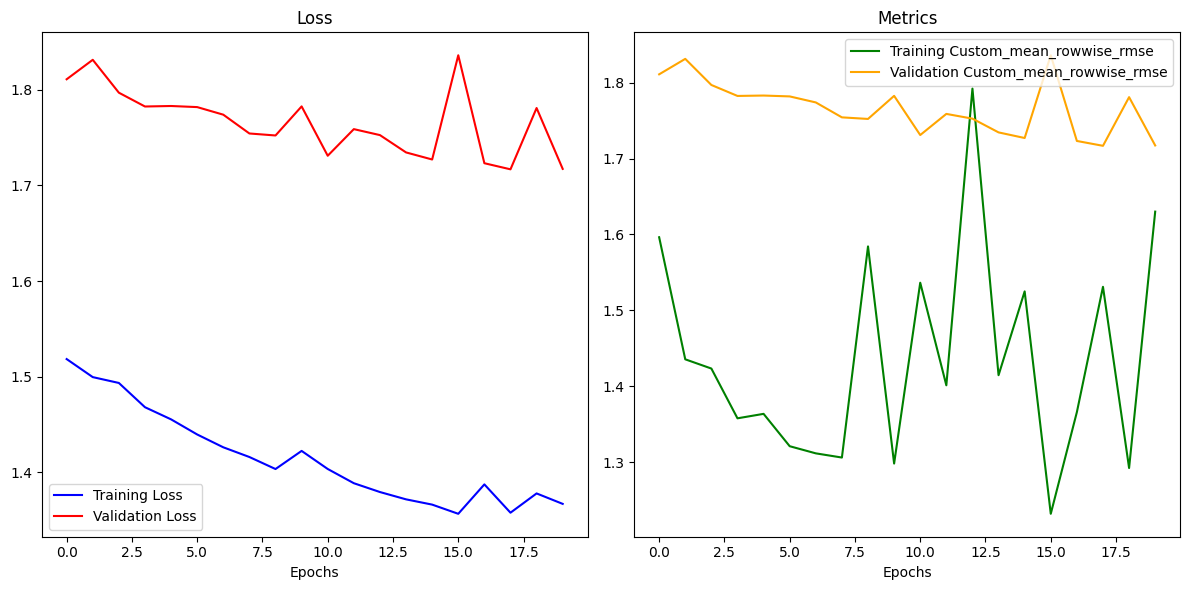

In [179]:
# Visualize the learning from our helper functions
plot_training_history(history_0, metrics=["custom_mean_rowwise_rmse"])

## Complex Model

In [251]:
tf.random.set_seed(42)

model_2 = Sequential([ 
    Dense(2056),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(1028, activation="relu"),
    Dropout(0.2),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(n_outputs,activation= "linear")
])


model_2.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_2 = model_2.fit(X_train, y_train,
                       epochs=40,
                       verbose=0, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_2", monitor="val_mae")])

In [252]:
model_2.load_weights("model_2")
calculate_mae_and_mrrmse(model=model_2, data=X_test, y_true=y_test)

9/9 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.9932786817563111
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.6376215203773008


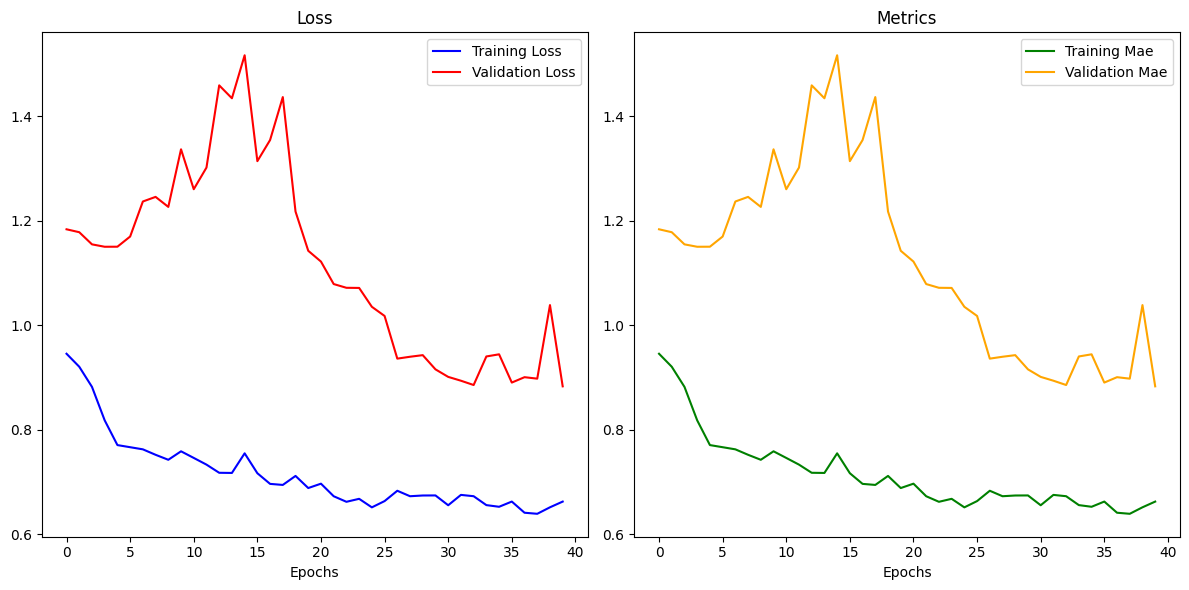

In [253]:
#  Visualize the learning from our helper functions
plot_training_history(history_2, metrics=["mae"])

In [232]:
tf.random.set_seed(42)

# clone model 2
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027),
                metrics=[custom_mean_rowwise_rmse])

history_3 = model_3.fit(X_train, y_train,
                       epochs=20,
                       verbose=0, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_3", monitor="val_custom_mean_rowwise_rmse")])

In [233]:
model_3.load_weights("model_3")
calculate_mae_and_mrrmse(model=model_3, data=X_test, y_true=y_test)

9/9 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 1.169682943108955
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.8047717241593928


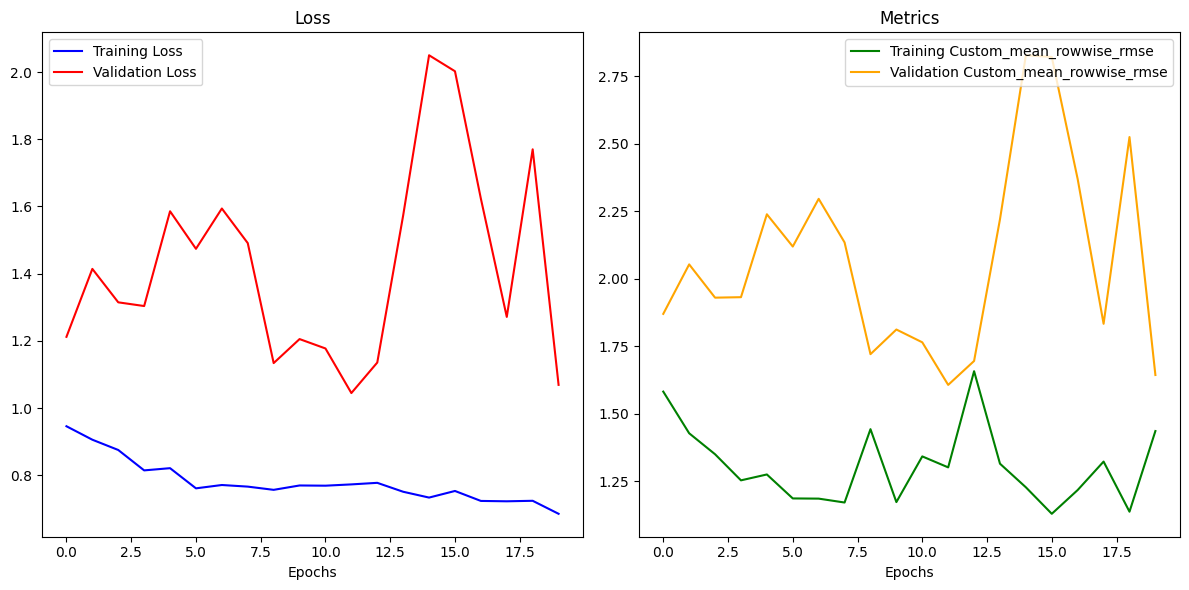

In [234]:
plot_training_history(history_3, metrics=["custom_mean_rowwise_rmse"])


In [248]:
tf.random.set_seed(42)

model_4 = Sequential([ 
    Dense(1028),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(n_outputs,activation= "linear")
])


model_4.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_4 = model_4.fit(X_train, y_train,
                       epochs=55,
                       verbose=0, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_4v2", monitor="val_mae")])

In [249]:
model_4.load_weights("model_4v2")
calculate_mae_and_mrrmse(model=model_4, data=X_test, y_true=y_test)

9/9 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.9410916598154597
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.574436831788998


In [216]:
model_4.load_weights("model_4")
calculate_mae_and_mrrmse(model=model_4, data=X_test, y_true=y_test)

9/9 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.9987523344261497
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.6504660209964876


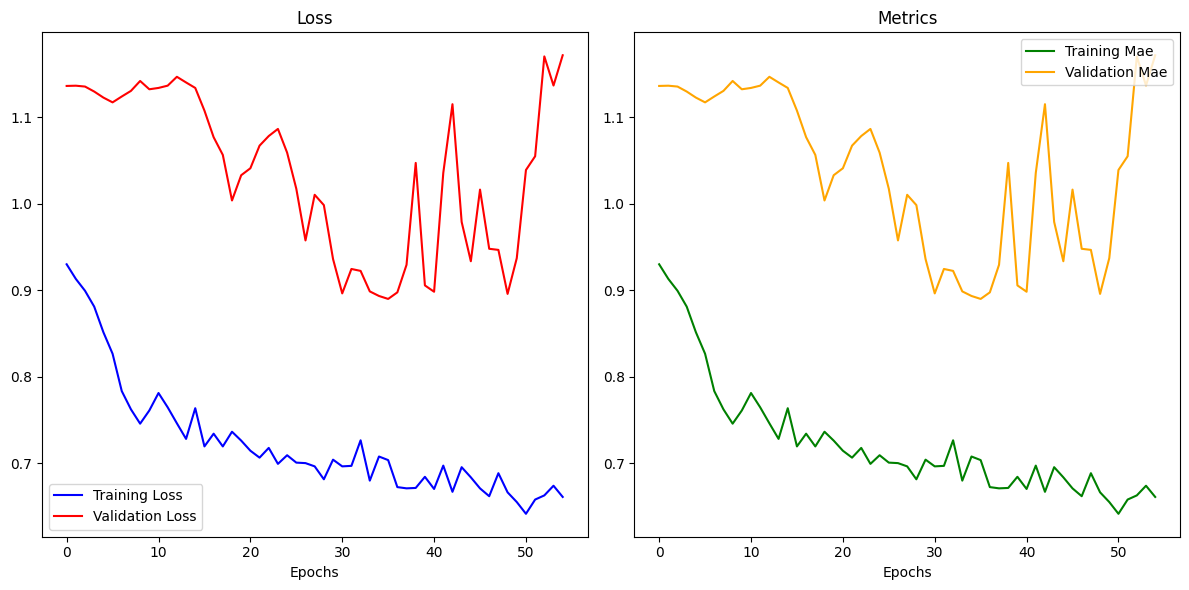

In [250]:
plot_training_history(history_4, metrics=["mae"])


In [219]:
model_4.predict(X_test)

1/1 [==============================] - 0s 49ms/step


array([[ 1.6112880e-01,  8.0049500e-02, -2.3681585e-02, ...,
         1.4195465e-01, -2.9092049e-02,  4.0665390e-03],
       [ 2.9892963e-01,  9.8864898e-02, -9.2069238e-02, ...,
         1.0185067e-01, -1.1092534e-02,  1.1601542e-02],
       [ 7.2001822e-02,  8.6260572e-02,  2.5643052e-03, ...,
         1.3278091e-01,  7.3868595e-04, -1.1041252e-02],
       ...,
       [ 4.5482658e-02,  8.4158659e-02, -5.1674418e-02, ...,
         1.3789578e-01, -2.5790120e-02, -2.3214648e-02],
       [ 1.2550168e-01,  7.8705817e-02, -3.1010713e-02, ...,
         1.4156406e-01, -3.5957225e-02, -1.0221390e-02],
       [ 4.4851050e+00,  2.4643424e+00,  3.9015576e-01, ...,
        -1.7027290e-01, -3.3967105e-01,  3.6940208e-01]], dtype=float32)